In [1]:
%pylab inline
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import pypot.robot


my_config ={}
my_config['controllers'] = {}
my_config['controllers']['upper_body_controler'] = {
    'port': '/dev/ttyUSB0',     # For Linux
    #'port': '/dev/tty.usbserial-AI03QEN0', # For OSX
    'sync_read': False,
    'attached_motors': ['arms'],
    'protocol': 1,
}
my_config['motorgroups']={}
my_config['motorgroups'] = {
    'arms': ['right_arm'],
    'right_arm': ['r_shoulder_x', 'r_shoulder_y', 'r_arm_z','r_elbow_y']
}
my_config['motors'] = {}
my_config['motors']['r_shoulder_y'] = {
    'id': 51,
    'type': 'MX-28',
    'orientation': 'indirect',
    'offset': 0.0,
    'angle_limit': (-80, 180),
}
my_config['motors']['r_shoulder_x'] = {
    'id': 52,
    'type': 'MX-28',
    'orientation': 'indirect',
    'offset': 0.0,
    'angle_limit': (-10, 175),
}
my_config['motors']['r_arm_z'] = {
    'id': 53,
    'type': 'MX-28',
    'orientation': 'indirect',
    'offset': 0.0,
    'angle_limit': (-95, 95),
}
my_config['motors']['r_elbow_y'] = {
    'id': 54,
    'type': 'MX-28',
    'orientation': 'indirect',
    'offset': 0.0,
    'angle_limit': (0, 125),
}

poppy = pypot.robot.from_config(my_config)

poppy.start_sync()
time.sleep(2)

for m in poppy.motors:
    m.compliant = False
    m.goto_behavior = 'minjerk'
pos = []
TIME = []
sys_load = []
speed = []
temp = []
volt = []

Populating the interactive namespace from numpy and matplotlib


In [5]:
pos = []
TIME = []
sys_load = []
speed = []
temp = []
volt = []

In [2]:
from poppy.creatures import PoppyRattle
poppy = PoppyRattle()
for m in poppy.motors:
    m.compliant = False
    m.goto_behavior = 'minjerk'

In [3]:
def rest_position():
    poppy.r_shoulder_x.goal_position = 0
    poppy.r_shoulder_y.goal_position = 0
    poppy.r_arm_z.goal_position = 0
    poppy.r_elbow_y.goal_position = 0
    

In [4]:
def app():
    pos.append(poppy.r_shoulder_x.present_position)
    pos.append(poppy.r_shoulder_y.present_position)
    pos.append(poppy.r_arm_z.present_position)
    pos.append(poppy.r_elbow_y.present_position)

    sys_load.append(poppy.r_shoulder_x.present_load)
    sys_load.append(poppy.r_shoulder_y.present_load)
    sys_load.append(poppy.r_arm_z.present_load)
    sys_load.append(poppy.r_elbow_y.present_load)
    
    speed.append(poppy.r_shoulder_x.present_speed)
    speed.append(poppy.r_shoulder_y.present_speed)
    speed.append(poppy.r_arm_z.present_speed)
    speed.append(poppy.r_elbow_y.present_speed)
    
    temp.append(poppy.r_shoulder_x.present_temperature)
    temp.append(poppy.r_shoulder_y.present_temperature)
    temp.append(poppy.r_arm_z.present_temperature)
    temp.append(poppy.r_elbow_y.present_temperature)
     
    volt.append(poppy.r_shoulder_x.present_voltage)
    volt.append(poppy.r_shoulder_y.present_voltage)
    volt.append(poppy.r_arm_z.present_voltage)
    volt.append(poppy.r_elbow_y.present_voltage)

In [6]:
def hand_wave(sec=10, rest=0.5):
    t0 = time.time()
    while True:
        
        t1 = time.time()
        if t1-t0 >= sec:
            break

        # run for sec
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_y.goal_position = -70
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_x.goal_position = -170  
        app()
        TIME.append(t1-t0)
        poppy.r_arm_z.goal_position = 60;
        app()
        TIME.append(t1-t0)
        poppy.r_elbow_y.goal_position = 125
        
        app()
        TIME.append(t1-t0)
        time.sleep(rest)
        
    
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_y.goal_position = -50
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_x.goal_position = -135
        app()
        TIME.append(t1-t0)
        poppy.r_arm_z.goal_position = 75
        app()
        TIME.append(t1-t0)
        poppy.r_elbow_y.goal_position = 90
        
        app()
        TIME.append(t1-t0)

        time.sleep(rest)
        app()
        TIME.append(t1-t0)

In [7]:
def hand_shake(sec=3, rest=0.5):

    t0 = time.time()
    
    while True:
        
        t1 = time.time()
        if t1-t0 >= sec:
            break 
        
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_y.goal_position = 35
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_x.goal_position = -135
        app()
        TIME.append(t1-t0)
        poppy.r_elbow_y.goal_position = 90
        app()
        TIME.append(t1-t0)
        poppy.r_arm_z.goal_position = 25
        time.sleep(rest-.01)
        
        app()
        poppy.r_shoulder_y.goal_position = 50
        TIME.append(t1-t0)
        time.sleep(rest+0.1)
        
        

In [8]:
for x in poppy.arms:
    print x

AttributeError: 'Robot' object has no attribute 'arms'

In [10]:
rest_position()

In [9]:
# reset arrays
pos = []
TIME = []
sys_load = []
speed = []
temp = []
volt = []

In [10]:
hand_wave()
time.sleep(0.25)
rest_position()

In [13]:
hand_shake()
time.sleep(0.25)
rest_position()

In [10]:
print len(pos)
print len(TIME)
print pos_Arr.size
print TIME_Arr.size
print speed_Arr[:,0].size

440
110
440
110
110


In [9]:
# formatting into arrays
pos_Arr = np.asarray(pos)
sys_load_Arr = np.asarray(sys_load)
speed_Arr = np.asarray(speed)
temp_Arr = np.asarray(temp)
volt_Arr = np.asarray(volt)
TIME_Arr = np.asarray(TIME)

pos_Arr = pos_Arr.reshape((pos_Arr.size / 4,4))
sys_load_Arr = sys_load_Arr.reshape((sys_load_Arr.size / 4,4))
speed_Arr = speed_Arr.reshape((speed_Arr.size / 4,4))
temp_Arr = temp_Arr.reshape((temp_Arr.size / 4,4))
volt_Arr = volt_Arr.reshape((volt_Arr.size / 4, 4))

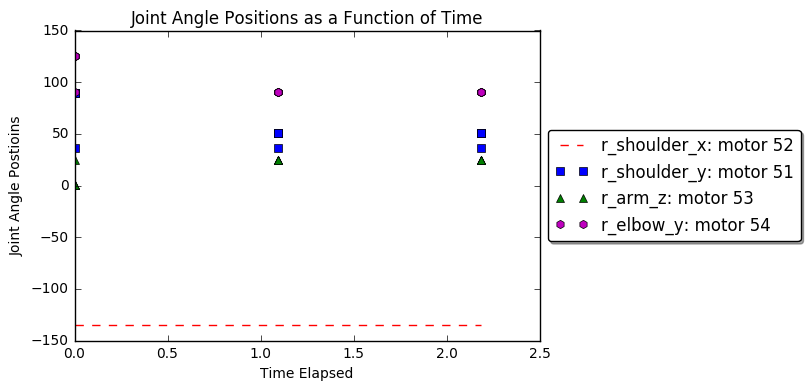

In [36]:
# Joint Angle Positions as a Function of Time

plt.plot(TIME_Arr,pos_Arr[:,0],'r--',label='r_shoulder_x: motor 52')
plt.plot(TIME_Arr,pos_Arr[:,1],'bs',label='r_shoulder_y: motor 51')
plt.plot(TIME_Arr,pos_Arr[:,2],'g^',label='r_arm_z: motor 53')
plt.plot(TIME_Arr,pos_Arr[:,3],'mh',label='r_elbow_y: motor 54')

plt.legend(shadow=True, fancybox=True,loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Joint Angle Positions as a Function of Time')
pylab.xlabel('Time Elapsed')
pylab.ylabel('Joint Angle Postioins')


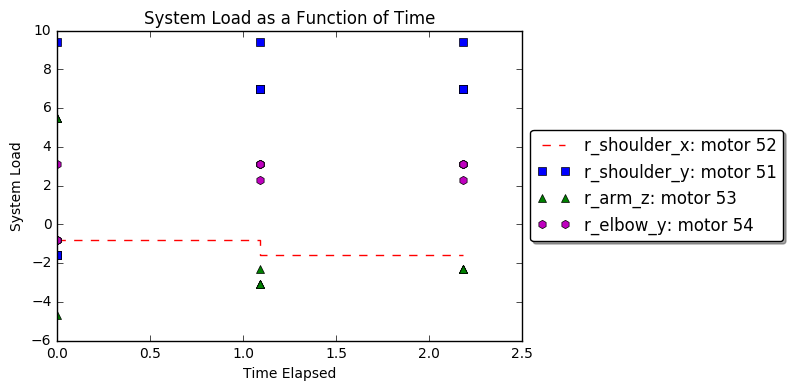

In [37]:
# System Load as a Function of Time

plt.plot(TIME_Arr,sys_load_Arr[:,0],'r--',label='r_shoulder_x: motor 52')
plt.plot(TIME_Arr,sys_load_Arr[:,1],'bs',label='r_shoulder_y: motor 51')
plt.plot(TIME_Arr,sys_load_Arr[:,2],'g^',label='r_arm_z: motor 53')
plt.plot(TIME_Arr,sys_load_Arr[:,3],'mh',label='r_elbow_y: motor 54')

plt.legend(shadow=True, fancybox=True,loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('System Load as a Function of Time')
pylab.xlabel('Time Elapsed')
pylab.ylabel('System Load')

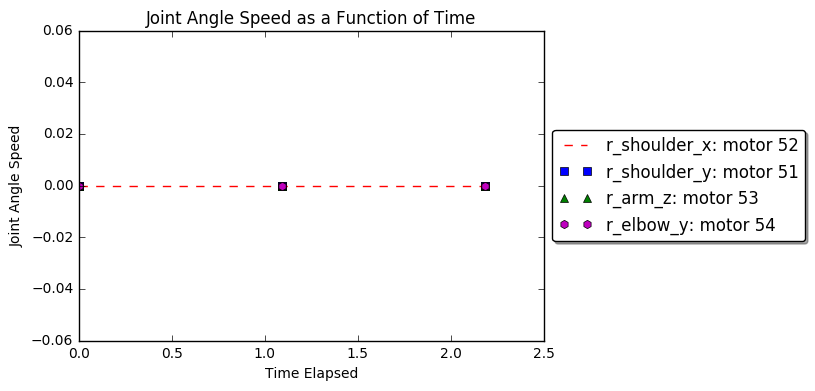

In [38]:
# Joint Angle Speed as a Function of Time

plt.plot(TIME_Arr,speed_Arr[:,0],'r--',label='r_shoulder_x: motor 52')
plt.plot(TIME_Arr,speed_Arr[:,1],'bs',label='r_shoulder_y: motor 51')
plt.plot(TIME_Arr,speed_Arr[:,2],'g^',label='r_arm_z: motor 53')
plt.plot(TIME_Arr,speed_Arr[:,3],'mh',label='r_elbow_y: motor 54')

plt.legend(shadow=True, fancybox=True,loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Joint Angle Speed as a Function of Time')
pylab.xlabel('Time Elapsed')
pylab.ylabel('Joint Angle Speed')


In [8]:
# Joint Temperature as a Function of Time

plt.plot(TIME_Arr,temp_Arr[:,0],'r--',label='r_shoulder_x: motor 52')
plt.plot(TIME_Arr,temp_Arr[:,1],'bs',label='r_shoulder_y: motor 51')
plt.plot(TIME_Arr,temp_Arr[:,2],'g^',label='r_arm_z: motor 53')
plt.plot(TIME_Arr,temp_Arr[:,3],'mh',label='r_elbow_y: motor 54')

plt.legend(shadow=True, fancybox=True,loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Joint Temperature as a Function of Time')
pylab.xlabel('Time Elapsed')
pylab.ylabel('Joint Temperature')


NameError: name 'TIME_Arr' is not defined

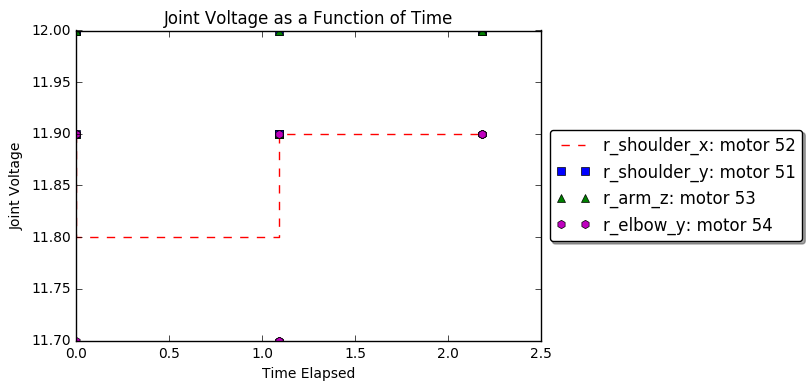

In [40]:
# Joint Voltage as a Function of Time

plt.plot(TIME_Arr,volt_Arr[:,0],'r--',label='r_shoulder_x: motor 52')
plt.plot(TIME_Arr,volt_Arr[:,1],'bs',label='r_shoulder_y: motor 51')
plt.plot(TIME_Arr,volt_Arr[:,2],'g^',label='r_arm_z: motor 53')
plt.plot(TIME_Arr,volt_Arr[:,3],'mh',label='r_elbow_y: motor 54')

plt.legend(shadow=True, fancybox=True,loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Joint Voltage as a Function of Time')
pylab.xlabel('Time Elapsed')
pylab.ylabel('Joint Voltage')



In [11]:
# RUN at the end of working

pos = []
TIME = []
sys_load = []
speed = []
temp = []
volt = []
for m in poppy.motors:
    m.compliant = True
time.sleep(1)
poppy.stop_sync()
poppy.close()

NameError: name 'time' is not defined

In [7]:
poppy.arms_turn_compliant

AttributeError: 'Robot' object has no attribute 'arms_turn_compliant'